## Importación de las librerías

In [43]:
import pandas as pd

from imblearn.over_sampling import BorderlineSMOTE

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## Importación de los conjuntos de entrenamientos y test

In [68]:
train = pd.read_csv('/kaggle/input/feature-selection/train.csv')
train.shape

(4087, 13)

In [69]:
test = pd.read_csv('/kaggle/input/feature-selection/test.csv')
test.shape

(1022, 13)

No tocaremos el test, simplemente lo guardaremos como fichero sálida de kaggle para poder importar todo desde la misma fuente o notebook

## Desbalanceo de datos en train

[Text(0, 0, '3888'), Text(0, 0, '199')]

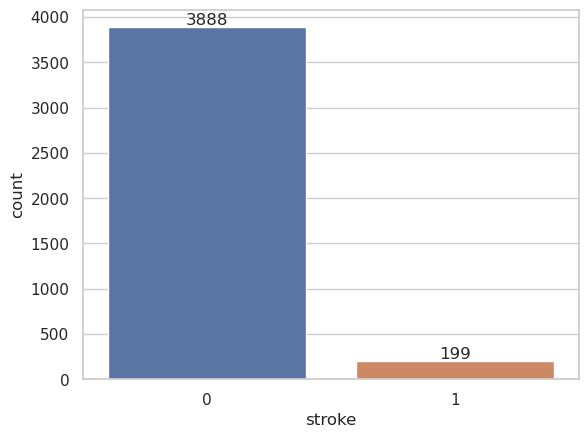

In [70]:
ax = sns.countplot(x='stroke', data=train)
ax.bar_label(ax.containers[0])

## Sobremuestreo con BorderlineSMOTE (borderline-1)

In [72]:
train.drop(['stroke'], axis=1)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.658203,1,0,1,0.578398,0.517302,0,0,0,1,0,0
1,0.707031,1,0,1,0.042295,0.434111,0,0,0,0,0,1
2,0.377441,0,0,1,0.927658,0.627152,0,1,0,0,0,1
3,0.804688,0,0,1,0.780787,0.458434,0,1,0,0,1,0
4,0.243164,0,0,0,0.579848,0.450477,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4082,0.792480,0,0,1,0.926401,0.630334,1,0,0,0,1,0
4083,0.951172,0,0,1,0.340193,0.466247,1,0,0,1,0,0
4084,0.096680,0,0,0,0.170920,0.341499,0,0,1,0,0,0
4085,0.731445,0,0,1,0.956574,0.611979,0,1,0,1,0,0


In [73]:
sm = BorderlineSMOTE(random_state=99, sampling_strategy='minority', kind='borderline-1')
X_train_smote, y_train_smote = sm.fit_resample(train.drop(['stroke'], axis=1), train.stroke)

**Nueva distribución**

In [76]:
X_train_smote['stroke'] = y_train_smote
X_train_smote.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.658203,1,0,1,0.578398,0.517302,0,0,0,1,0,0,0
1,0.707031,1,0,1,0.042295,0.434111,0,0,0,0,0,1,0
2,0.377441,0,0,1,0.927658,0.627152,0,1,0,0,0,1,0
3,0.804688,0,0,1,0.780787,0.458434,0,1,0,0,1,0,0
4,0.243164,0,0,0,0.579848,0.450477,1,0,0,0,0,0,0


In [77]:
print(train[(train.work_type_Private == 0) & (train.work_type_children == 0) & (train['work_type_Self-employed'] == 0)].shape)
print(X_train_smote[(X_train_smote.work_type_Private == 0) & (X_train_smote.work_type_children == 0) & (X_train_smote['work_type_Self-employed'] == 0)].shape)

(527, 13)
(901, 13)


Graficamos las nuevas muestras generadas para algunas variables continuas y categóricas

<AxesSubplot:xlabel='age', ylabel='bmi'>

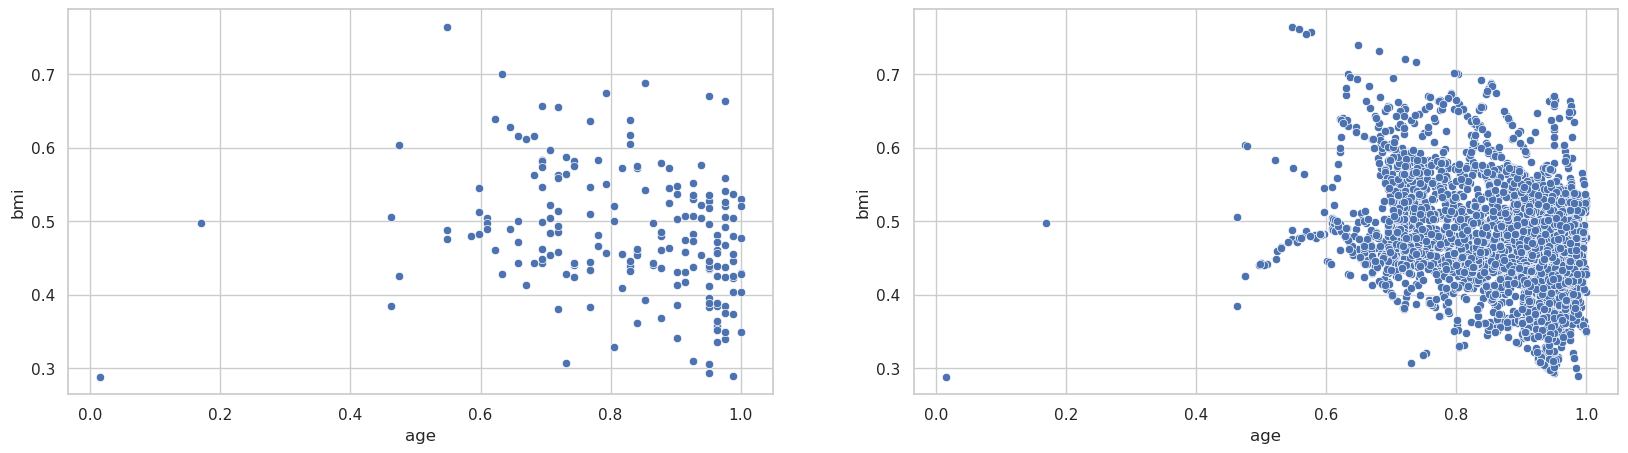

In [79]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

sns.scatterplot(data=train[(train['stroke'] == 1)], x="age", y="bmi", ax=axes[0])
sns.scatterplot(data=X_train_smote[(X_train_smote['stroke'] == 1)], x="age", y="bmi", ax=axes[1])

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

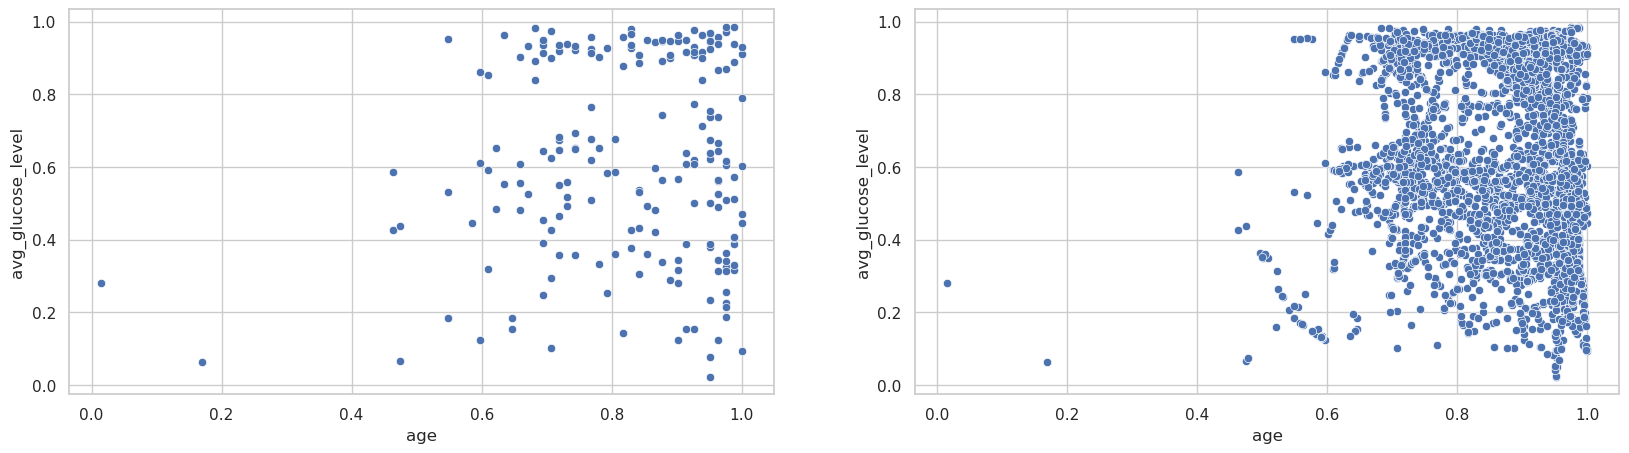

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

sns.scatterplot(data=train[(train['stroke'] == 1)], x="age", y="avg_glucose_level", ax=axes[0])
sns.scatterplot(data=X_train_smote[(X_train_smote['stroke'] == 1)], x="age", y="avg_glucose_level", ax=axes[1])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

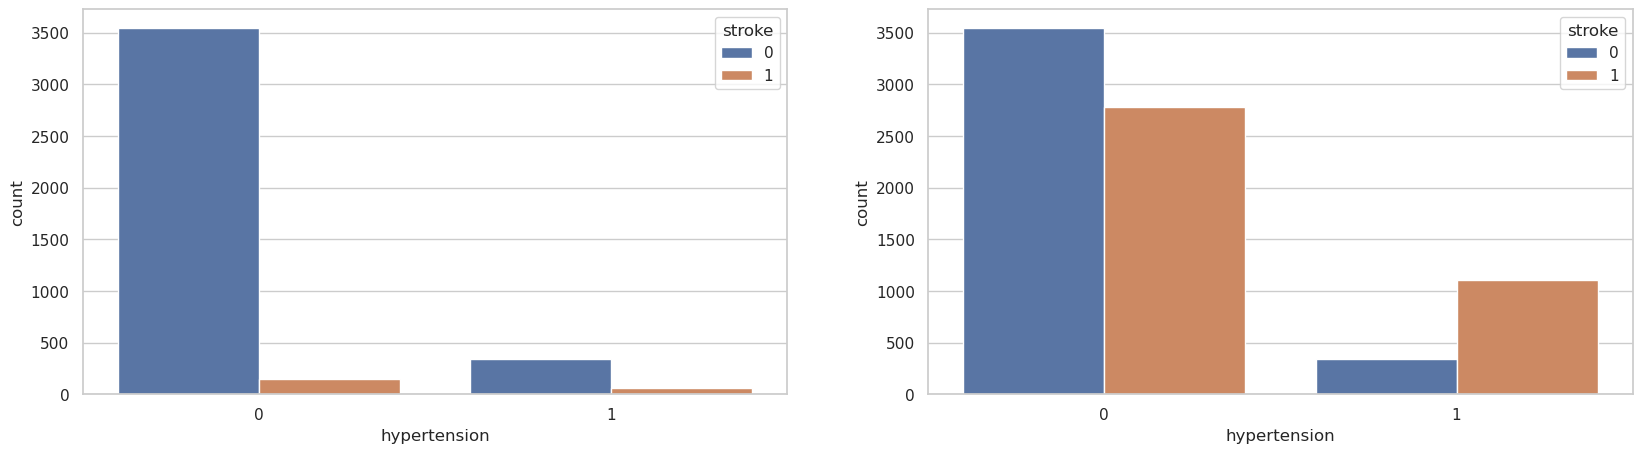

In [82]:
fig, axes = plt.subplots(ncols=2, figsize=(20,5))
sns.countplot(data=train, x='hypertension', hue='stroke', ax=axes[0])
sns.countplot(data=X_train_smote, x='hypertension', hue='stroke', ax=axes[1])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

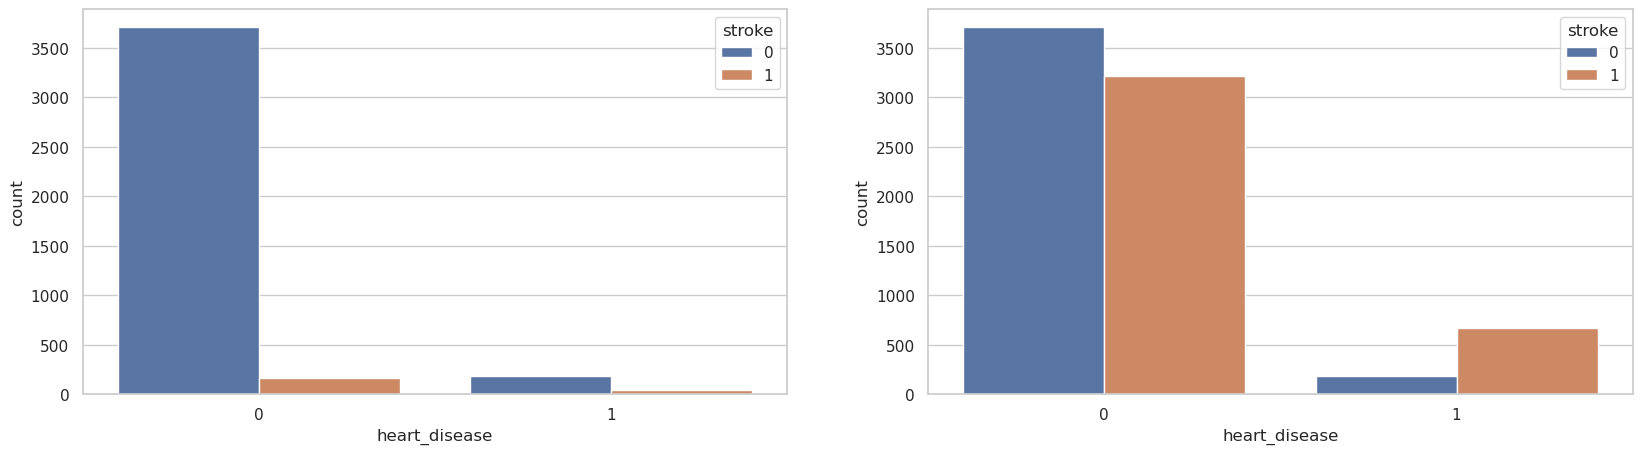

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(20,5))
sns.countplot(data=train, x='heart_disease', hue='stroke', ax=axes[0])
sns.countplot(data=X_train_smote, x='heart_disease', hue='stroke', ax=axes[1])

## Guardado del conjunto de train sobremuestreado para el modelado final

In [88]:
X_train_smote.to_csv('train_oversampled.csv', index=False)
test.to_csv('test.csv', index=False)